# Bibliotecas

In [380]:
# Bibliotecas para análise de dados
import pandas as pd

# Bibliotecas de visualização de dados
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# Bibliotecas para salvar gráficos interativos
import chart_studio
import chart_studio.plotly as py

In [381]:
# Loga minha conta para que seja possível salvar os gráficos interativos
username = 'CaueCaviglioni'
api_key = 'HAbI3JmHiHRrCCZA7QG0'
chart_studio.tools.set_credentials_file(username = username, api_key = api_key)

# 1. Inicialização da análise

In [335]:
# Leitura do arquivo csv
df = pd.read_csv(r'C:\Users\cauec\OneDrive\Área de Trabalho\quotas.csv')

In [336]:
# Visualização do topo dos dados
df.head()

,date,quota_value,net_worth,fund_name,fund_class
0,8/31/2020,1.710898,2.173858e+08,Fundo 1,Fundo de Ações
1,8/31/2020,1.708746,1.848605e+08,Fundo 2,Fundo de Ações
2,8/31/2020,1.763618,5.398929e+09,Fundo 3,Fundo de Ações
3,8/31/2020,1.287330,2.975126e+07,Fundo 4,Fundo de Ações
4,8/31/2020,1.236828,9.534258e+07,Fundo 5,Fundo de Ações


In [337]:
# Informações dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13417 entries, 0 to 13416
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         13417 non-null  object 
 1   quota_value  13417 non-null  float64
 2   net_worth    13417 non-null  float64
 3   fund_name    13417 non-null  object 
 4   fund_class   13417 non-null  object 
dtypes: float64(2), object(3)
memory usage: 524.2+ KB


# 2. Tratamento dos dados

## 2.1. Retirar fundos que não são de ação

In [338]:
# Seleciona somente os fundos de ações
df = df[df['fund_class'] == 'Fundo de Ações']

# Verifica se foi feito corretamente
df['fund_class'].value_counts()

Fundo de Ações    5074
Name: fund_class, dtype: int64

## 2.3. Retirar valores de cota que sejam igual a 0 (considerado que não registrado corretamente

In [339]:
# Verifica as linhas em que o valor da cota é igual a 0
df[df['quota_value'].isin([0])]

,date,quota_value,net_worth,fund_name,fund_class
107,8/31/2020,0.0,0.0,Fundo 108,Fundo de Ações
357,8/31/2020,0.0,0.0,Fundo 358,Fundo de Ações
441,8/31/2020,0.0,0.0,Fundo 442,Fundo de Ações
1299,9/2/2020,0.0,0.0,Fundo 442,Fundo de Ações
1300,9/1/2020,0.0,0.0,Fundo 442,Fundo de Ações
1854,9/1/2020,0.0,0.0,Fundo 358,Fundo de Ações
2203,9/1/2020,0.0,0.0,Fundo 108,Fundo de Ações
2204,9/2/2020,0.0,0.0,Fundo 108,Fundo de Ações
3042,9/7/2020,0.0,0.0,Fundo 13,Fundo de Ações


In [340]:
# Tira tais linhas
df = df.drop([3042])

## 2.2. Retirar fundos que não tenham valores de cota disponíveis em todos os 22 dias úteis de Setembro

In [341]:
# Conta quantos dias úteis cada fundo está disponível
quant_dias = df['fund_name'].value_counts()

# Seleciona no dataframe original somente os fundos com 22 dias disponíveis
df = df[df['fund_name'].isin(quant_dias[quant_dias == 22].index)]

In [342]:
df.head()

,date,quota_value,net_worth,fund_name,fund_class
0,8/31/2020,1.710898,2.173858e+08,Fundo 1,Fundo de Ações
1,8/31/2020,1.708746,1.848605e+08,Fundo 2,Fundo de Ações
2,8/31/2020,1.763618,5.398929e+09,Fundo 3,Fundo de Ações
3,8/31/2020,1.287330,2.975126e+07,Fundo 4,Fundo de Ações
4,8/31/2020,1.236828,9.534258e+07,Fundo 5,Fundo de Ações


## 2.3. Rearranjo do banco de dados

In [343]:
# Converter a coluna date para o formato correto
df['date'] = pd.to_datetime(df['date'])

In [344]:
# Organizar linhas, agrupando os fundos e colocando as datas em ordem crescente
df = df.sort_values(by = ['fund_name', 'date'])

In [345]:
# Visualiza os dados
df.head()

,date,quota_value,net_worth,fund_name,fund_class
0,2020-08-31,1.710898,217385837.9,Fundo 1,Fundo de Ações
1718,2020-09-01,1.753410,222896658.0,Fundo 1,Fundo de Ações
1717,2020-09-02,1.760532,224147179.5,Fundo 1,Fundo de Ações
1716,2020-09-03,1.722689,215889595.7,Fundo 1,Fundo de Ações
2828,2020-09-04,1.719394,215823919.4,Fundo 1,Fundo de Ações


# 3. Top 5 Fundos com maior retorno acumulado no mês

## 3.1. Cálculo dos top 5 Fundos

In [346]:
# Calcula os retornos mensais de cada fundo e guarda em um dicionário
retornos_mensais = {}
for i in range(0, df['quota_value'].shape[0], 22):
    fundo = df['fund_name'].iloc[i] 
    retorno_acum_mensal = (df['quota_value'].iloc[i+21] - df['quota_value'].iloc[i])/ df['quota_value'].iloc[i]
    retornos_mensais[fundo] = retorno_acum_mensal

In [347]:
# Seleciona os top 5 retornos
lista_retor_mensais = list(retornos_mensais.values())
lista_retor_mensais.sort(reverse = True)
top_5_retornos = lista_retor_mensais[0:5]

# Encontra os fundos correspondentes a estes retornos
top_5_fundos = [key for key, value in retornos_mensais.items() if value in top_5_retornos]
print(top_5_fundos)

['Fundo 114', 'Fundo 146', 'Fundo 195', 'Fundo 224', 'Fundo 290']


## *Logo, os cinco fundos com maior retorno acumulado mensal são os fundos: 114, 146, 195, 224 e 290*

## 3.2. Gráfico dos top 5 fundos com retornos acumulados diários

In [348]:
# Monta dataframe somente com os dados destes 5 fundos
df_top_5_fundos = df[df['fund_name'].isin(top_5_fundos)]

# Reorganiza os fundos em coluna
df_top_5_fundos = df_top_5_fundos.pivot_table(index = 'date', 
                                              columns = 'fund_name', 
                                              values = 'quota_value')

In [349]:
df_top_5_fundos.head()

fund_name,Fundo 114,Fundo 146,Fundo 195,Fundo 224,Fundo 290
date,,,,,
2020-08-31,1.368116,2.091418,355.156204,1.969079,10.750142
2020-09-01,1.350553,2.061368,352.525603,1.920086,11.123569
2020-09-02,1.366819,2.091560,354.396586,1.952109,11.044440
2020-09-03,1.329115,2.030850,344.137412,1.856886,10.684525
2020-09-04,1.330352,2.030067,343.754498,1.849048,10.894730


In [350]:
# Calcula os retornos diários de cada fundo e cria um novo dataframe
df_retornos_diarios = df_top_5_fundos.pct_change()

# Retira a primeira linha do dataframe (valores NaN)
df_retornos_diarios = df_retornos_diarios[1:]

# Visualiza o dataframe
df_retornos_diarios.head()

fund_name,Fundo 114,Fundo 146,Fundo 195,Fundo 224,Fundo 290
date,,,,,
2020-09-01,-0.012838,-0.014368,-0.007407,-0.024881,0.034737
2020-09-02,0.012044,0.014647,0.005307,0.016678,-0.007114
2020-09-03,-0.027586,-0.029026,-0.028948,-0.048779,-0.032588
2020-09-04,0.000931,-0.000386,-0.001113,-0.004221,0.019674
2020-09-08,0.001385,-0.000519,0.006593,-0.005022,-0.020107


In [351]:
# Calcula os retornos diários acumulados para os top 5 fundos
df_retornos_diarios_acum = (1 + df_retornos_diarios).cumprod() - 1

# Reseta o index da tabela
df_retornos_diarios_acum = df_retornos_diarios_acum.reset_index()

# Visualiza os dados
df_retornos_diarios_acum.head()

fund_name,date,Fundo 114,Fundo 146,Fundo 195,Fundo 224,Fundo 290
0,2020-09-01,-0.012838,-0.014368,-0.007407,-0.024881,0.034737
1,2020-09-02,-0.000948,0.000068,-0.002139,-0.008618,0.027376
2,2020-09-03,-0.028507,-0.028960,-0.031025,-0.056977,-0.006104
3,2020-09-04,-0.027603,-0.029334,-0.032103,-0.060958,0.013450
4,2020-09-08,-0.026256,-0.029838,-0.025722,-0.065674,-0.006928


In [352]:
# Reorganiza a tabela
df_retornos_diarios_acum = df_retornos_diarios_acum.melt(id_vars = 'date', 
                                                         var_name = 'fund_name', 
                                                         value_name = 'daily_return_cum')

# Transforma os retornos diários acumulados em porcentagem
df_retornos_diarios_acum['daily_return_cum'] = df_retornos_diarios_acum['daily_return_cum']*100

# Visualiza os dados
df_retornos_diarios_acum.head()

,date,fund_name,daily_return_cum
0,2020-09-01,Fundo 114,-1.283761
1,2020-09-02,Fundo 114,-0.094793
2,2020-09-03,Fundo 114,-2.850749
3,2020-09-04,Fundo 114,-2.760309
4,2020-09-08,Fundo 114,-2.625611


In [382]:
# Plot
fig = px.line(df_retornos_diarios_acum, 
              x = 'date', 
              y = 'daily_return_cum', 
              color = 'fund_name', 
              title = 'Retorno Diário Acumulado - Top 5 Fundos')

# Configurações do plot
fig.update_layout({'xaxis': {'title': {'text': 'Data'}}, 
                   'yaxis': {'title': {'text': 'Retorno Diário Acumulado (%)'}},
                   'legend': {'title': {'text': 'Fundos'}}})

# Salva o gráfico interativo
py.plot(fig, filename = 'Retornos Diários Acumulados - Top 5 Fundos', auto_open = False)

# Mostra o plot
fig.show()

## 3.3. Correlação dos top 5 fundos

In [359]:
# Calcula a correlação entre os retornos diarios dos fundos
corr_retornos = df_retornos_diarios.corr()

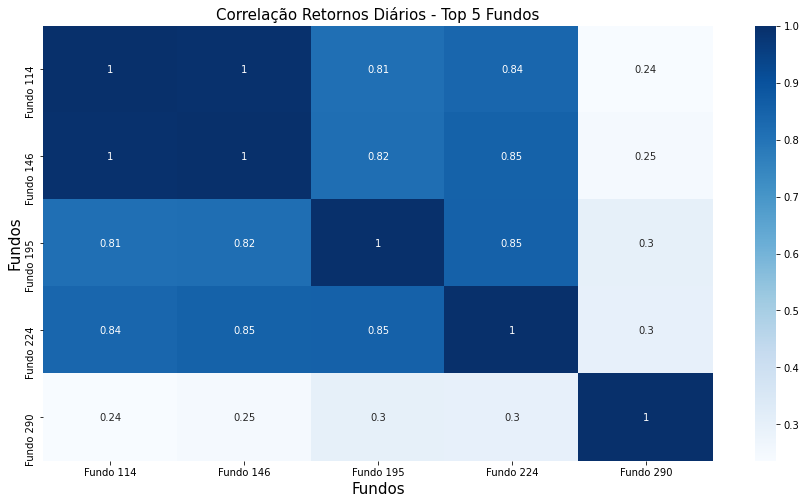

In [383]:
# Tamanho do plot
plt.figure(figsize=(15,8))

# Plota uma matriz de correlação
fig = sns.heatmap(corr_retornos, 
                  cmap="Blues", 
                  annot = True)

# Configurações do plot
fig.set_xlabel('Fundos',
               fontsize = 15)
fig.set_ylabel('Fundos',
               fontsize = 15)
fig.set_title('Correlação Retornos Diários - Top 5 Fundos', 
              fontsize = 15)

# Mostra o plot
plt.show()

## *Logo, dentre os cinco fundos com maior retorno mensal acumulado, aqueles que adotaram estratégias parecidas foram os fundos com correlação maior que 0.8*